# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Ella Kovach.</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


*In the Animal Agent model it appears to be demonstarting all the different factors for predator vs. prey and how they affect one another and their population. The characteristics are predators can hunt prey, prey can procreate, and both predator and prey can move around and age. Classes within the model consist of procreation if it is a prey, therefore taking into account varaibles such as what type animal it is, what the litter size and age to see if it it still can procreate, that wil then sum the total child_list aka population. This will allow the Prey part of the model to keep growing and moving. Another class within the model is hunting if it is a predator, this allows for the predators to hunt and kill prey. Therefore keeping the prey alive and killing the predators in the model. Allowing the agent based model to keep following and interacting.

In the Environment model it appears to be simulating the animals environment and plots the animals environment. A few of the classes add an animal, simulate and plot the environment. This allows to plot the environment accurately with animals on it and the environment set. so the agent based model can be visualized.*

In [72]:
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
from Animal_Agent_Class import Animal_Agent
from Environment import Environment

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

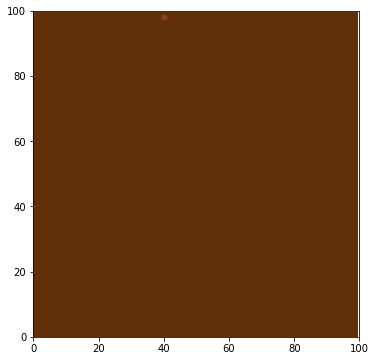

In [73]:
#Write your code here
jerry = Animal_Agent()
Land = Environment()

Land.add_agent(jerry)
Land.simulate(10)

*After a lot of inspection, I noticed that in the environment when we are calling procreate the order is wrong for calling the variables. it called time before the agent list, so I switched the agent list first and then had time following it. This should fix the bug.*

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


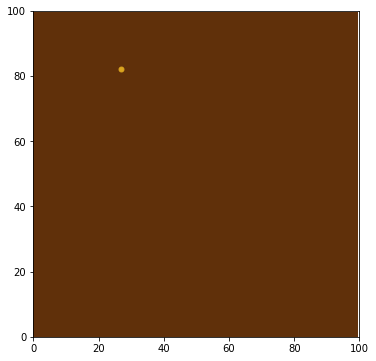

In [74]:
#Write your code here
import random
jerry.set_allele(random.randint(0,1),random.randint(0,1))
Land.simulate(10)


### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

In [75]:
#Write your code here
tom = Animal_Agent(ptype = "Predator", shape = "P", color = "red")
Land.add_agent(tom)

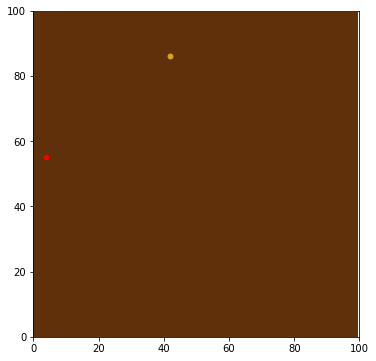

In [76]:
Land.simulate(10)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

In [83]:
#Write your code here
import random
new_environment = Environment()
jo = Animal_Agent(sex = "F")
jo.set_allele(random.randint(0,1),random.randint(0,1))
john = Animal_Agent()
john.set_allele(random.randint(0,1),random.randint(0,1))
karl = Animal_Agent(sex = "F")
karl.set_allele(0,0)
martin = Animal_Agent()
martin.set_allele(random.randint(0,1),random.randint(0,1))
pat = Animal_Agent(sex = "F")
pat.set_allele(random.randint(0,1),random.randint(0,1))
george = Animal_Agent()
george.set_allele(random.randint(0,1),random.randint(0,1))
tot = Animal_Agent(sex = "F")
tot.set_allele(random.randint(0,1),random.randint(0,1))
lot = Animal_Agent()
lot.set_allele(random.randint(0,1),random.randint(0,1))
patty = Animal_Agent(sex = "F")
patty.set_allele(random.randint(0,1),random.randint(0,1))
georgie = Animal_Agent()
georgie.set_allele(random.randint(0,1),random.randint(0,1))
tots = Animal_Agent(sex = "F")
tots.set_allele(random.randint(0,1),random.randint(0,1))
lots = Animal_Agent()
lots.set_allele(random.randint(0,1),random.randint(0,1))
pa = Animal_Agent(sex = "F")
pa.set_allele(random.randint(0,1),random.randint(0,1))
geo = Animal_Agent()
geo.set_allele(random.randint(0,1),random.randint(0,1))
to = Animal_Agent(sex = "F")
to.set_allele(random.randint(0,1),random.randint(0,1))
lo = Animal_Agent()
lo.set_allele(random.randint(0,1),random.randint(0,1))
paz = Animal_Agent(sex = "F")
paz.set_allele(random.randint(0,1),random.randint(0,1))
geoz = Animal_Agent()
geoz.set_allele(random.randint(0,1),random.randint(0,1))
toz = Animal_Agent(sex = "F")
toz.set_allele(random.randint(0,1),random.randint(0,1))
loz = Animal_Agent()
loz.set_allele(random.randint(0,1),random.randint(0,1))

new_environment.add_agent(jo)
new_environment.add_agent(john)
new_environment.add_agent(karl)
new_environment.add_agent(martin)
new_environment.add_agent(pat)
new_environment.add_agent(george)
new_environment.add_agent(tot)
new_environment.add_agent(lot)
new_environment.add_agent(patty)
new_environment.add_agent(georgie)
new_environment.add_agent(tots)
new_environment.add_agent(lots)
new_environment.add_agent(pa)
new_environment.add_agent(geo)
new_environment.add_agent(to)
new_environment.add_agent(lo)
new_environment.add_agent(paz)
new_environment.add_agent(geoz)
new_environment.add_agent(toz)
new_environment.add_agent(loz)


fred = Animal_Agent(ptype = "Predator", color = "red")
freddie = Animal_Agent(ptype = "Predator", color = "red")

new_environment.add_agent(fred)
new_environment.add_agent(freddie)

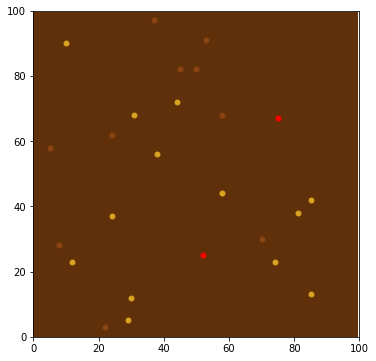

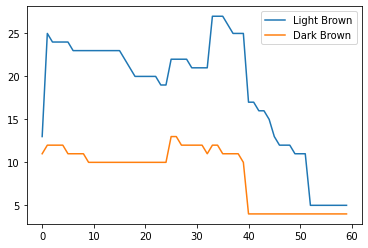

In [84]:
new_environment.simulate(10)
new_environment.simulate_plot_populations(60)

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

*The population appears to evolve periodically over time. I think this shape is caused by gestation time, time between each procreation, and if the prey are close enough to procreate. These variables lead to a more step like evolution since procreation can only occur sometimes. The light brown population appears to have a higher population, this makes sense since it is the dominant trait. Therefore it is much easier to produce a light brown mouse than a dark brown mouse. The dark brown mice are always lower in population and tend to die out before the light brown. This makes sense since that is the recessive trait and they would be harder to reproduce and therefore easier to kill off since less of them are being produced.*

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [41]:
class Mouse(Animal_Agent):

    def __init__(self,xmax=100,ymax=100,ptype="Prey",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
         super().__init__(xmax, ymax, ptype, sex, age_limit, catch_radius, mate_range, gestation, shape, color, saturation_pop)
    
    def set_allele(self, alle_d, alle_m):

        self.alle_d = alle_d
        self.alle_m = alle_m
        
        # Here we set light animal color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95
            
        else:
            self.color = "saddlebrown"
            self.catch_probability = 0.05

    
    def procreate(self,all_agents,time):
        child_list = []
        val = random.random()
        if (self.sex == 'F') and (np.mod(abs(time-self.last_litter_time),self.gestation) == 0):
            for agent in all_agents:
                if (agent.ptype=="Prey") and (agent.sex == "M") and (self.get_distance(agent) <= self.mate_range) and (val > (1.0/(1.0+np.exp(-len(all_agents)/self.saturation_pop)))):
                    child_num = int(np.random.normal(7,1))
                    for jj in range(child_num):
                        mom_a = self.alle_d
                        if np.random.randint(0,2) == 1:
                            mom_a = self.alle_m
                        dad_a = agent.alle_d
                        if np.random.randint(0,2) == 1:
                            dad_a = agent.alle_m               
                        child = Mouse(sex="F")
                        if np.random.randint(0,2) == 1:
                            child = Mouse(sex="M")
                        child.set_allele(dad_a,mom_a)
                        child_list.append(child)
                    self.last_litter_time = time
                    break

        return child_list

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [63]:
#Write your code here
class Hawk(Animal_Agent):
    
    def __init__(self,ptype="Predator",shape="p",color="red"):
         super().__init__(xmax=100,ymax=100,ptype=ptype,sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape=shape,color=color,saturation_pop=150)
    
    def hunt(self,all_agents):
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if (self.get_distance(agent) < self.catch_radius) and (random.random() < agent.catch_probability):
                    agent.is_caught = True
                    return agent       
        return False 


### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

In [89]:
import random
yard = Environment()
jo = Mouse(sex = "F")
jo.set_allele(random.randint(0,1),random.randint(0,1))
john = Mouse()
john.set_allele(random.randint(0,1),random.randint(0,1))
karl = Mouse(sex = "F")
karl.set_allele(0,0)
martin = Mouse()
martin.set_allele(random.randint(0,1),random.randint(0,1))
pat = Mouse(sex = "F")
pat.set_allele(random.randint(0,1),random.randint(0,1))
george = Mouse()
george.set_allele(random.randint(0,1),random.randint(0,1))
tot = Mouse(sex = "F")
tot.set_allele(random.randint(0,1),random.randint(0,1))
lot = Mouse()
lot.set_allele(random.randint(0,1),random.randint(0,1))
patty = Mouse(sex = "F")
patty.set_allele(random.randint(0,1),random.randint(0,1))
georgie = Mouse()
georgie.set_allele(random.randint(0,1),random.randint(0,1))
tots = Mouse(sex = "F")
tots.set_allele(random.randint(0,1),random.randint(0,1))
lots = Mouse()
lots.set_allele(random.randint(0,1),random.randint(0,1))
pa = Mouse(sex = "F")
pa.set_allele(random.randint(0,1),random.randint(0,1))
geo = Mouse()
geo.set_allele(random.randint(0,1),random.randint(0,1))
to = Mouse(sex = "F")
to.set_allele(random.randint(0,1),random.randint(0,1))
lo = Mouse()
lo.set_allele(random.randint(0,1),random.randint(0,1))
paz = Mouse(sex = "F")
paz.set_allele(random.randint(0,1),random.randint(0,1))
geoz = Mouse()
geoz.set_allele(random.randint(0,1),random.randint(0,1))
toz = Mouse(sex = "F")
toz.set_allele(random.randint(0,1),random.randint(0,1))
loz = Mouse()
loz.set_allele(random.randint(0,1),random.randint(0,1))


yard.add_agent(jo)
yard.add_agent(john)
yard.add_agent(karl)
yard.add_agent(martin)
yard.add_agent(pat)
yard.add_agent(george)
yard.add_agent(tot)
yard.add_agent(lot)
yard.add_agent(patty)
yard.add_agent(georgie)
yard.add_agent(tots)
yard.add_agent(lots)
yard.add_agent(pa)
yard.add_agent(geo)
yard.add_agent(to)
yard.add_agent(lo)
yard.add_agent(paz)
yard.add_agent(geoz)
yard.add_agent(toz)
yard.add_agent(loz)


fred = Hawk()
freddie = Hawk()


yard.add_agent(fred)
yard.add_agent(freddie)

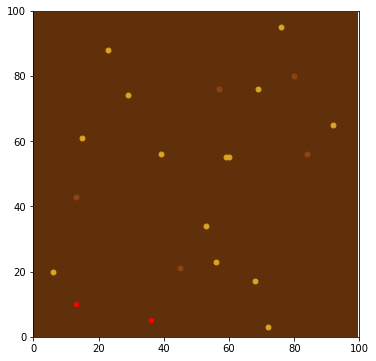

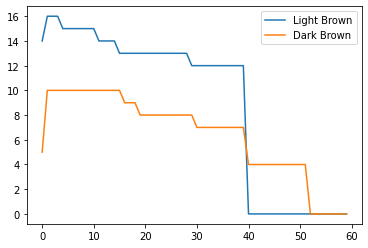

In [90]:
yard.simulate(10)
yard.simulate_plot_populations(60)

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

*It is similar to 1.5, however now that catch probability is taken into account. It appears that the dark mice are able to stick around for longer than in the first model since they are harder to catch. However they still are less likely to be produced, so their are less of them in the population. However I think we can see more of the effects of natural selection come to light since the dark mice have adapted more and are less likely to be caught. Which can be seen when they are lasting just as long if not longer as the light mice who have a larger population.*

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.